## Caracterización

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

data = "Datos_Bcte_n.xlsx"
data = pd.read_excel(data)
data

,I (mA),I_err (mA),VH_0.75A (mV),VH_0.80A (mV),VH_0.85A (mV),VH_0.90A (mV),VH_0.95A (mV),VH_err (mV)
0,-30,1,36.3,38.1,39.6,44.2,46.1,0.1
1,-25,1,31.2,31.6,34.9,37.5,38.8,0.1
2,-20,1,25.5,26.2,28.3,30.2,30.6,0.1
3,-15,1,19.6,20.3,21.4,23.8,25.5,0.1
4,-10,1,14.6,15.8,15.4,16.1,16.9,0.1
5,-5,1,9.0,9.1,9.3,10.8,9.9,0.1
6,0,1,3.5,3.9,1.1,4.0,3.8,0.1
7,5,1,-4.4,-4.0,-4.3,-4.2,-4.3,0.1
8,10,1,-9.3,-9.1,-9.9,-10.4,-11.1,0.1
9,15,1,-15.0,-15.0,-16.2,-17.1,-18.3,0.1


In [2]:
X = data['I (mA)']
Xerr = data['I_err (mA)']

Y = data['VH_0.75A (mV)']
Yerr = data['VH_err (mV)']

w = 1/(Yerr**2)

X

0    -30
1    -25
2    -20
3    -15
4    -10
5     -5
6      0
7      5
8     10
9     15
10    20
11    25
12    30
Name: I (mA), dtype: int64

In [3]:
sum_w = w.sum()
sum_wx = (w*X).sum()
sum_wy = (w*Y).sum()
sum_wxx = (w*X**2).sum()
sum_wxy = (w*X*Y).sum()

In [4]:
m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

In [5]:
print(m)
print(b)

print(m_std_err)
print(b_std_err)

-1.1362637362637362
2.676923076923076
0.0014824986333222025
0.02773500981126146


In [6]:
model1 = (-1.136)*X + (2.68)

Text(0, 0.5, 'Voltaje de Hall (mV)')

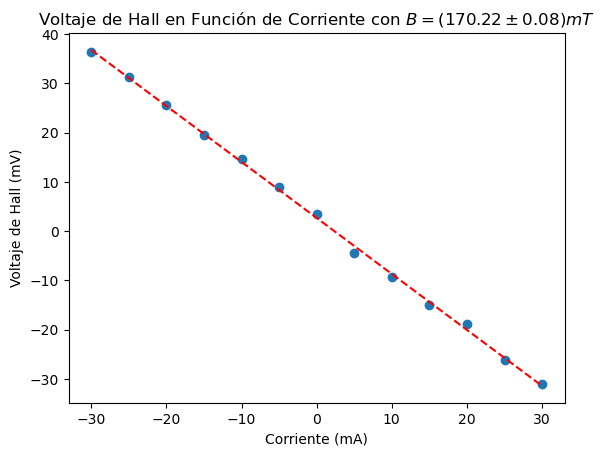

In [7]:
plt.scatter(X, Y)
plt.plot(X, model1, color = 'red', linestyle='--')
plt.title('Voltaje de Hall en Función de Corriente con ' + r'$B = (170.22\pm 0.08)mT$')
plt.xlabel('Corriente (mA)')
plt.ylabel('Voltaje de Hall (mV)')
#plt.savefig('Bcte_p_0.75A.png', format='png')

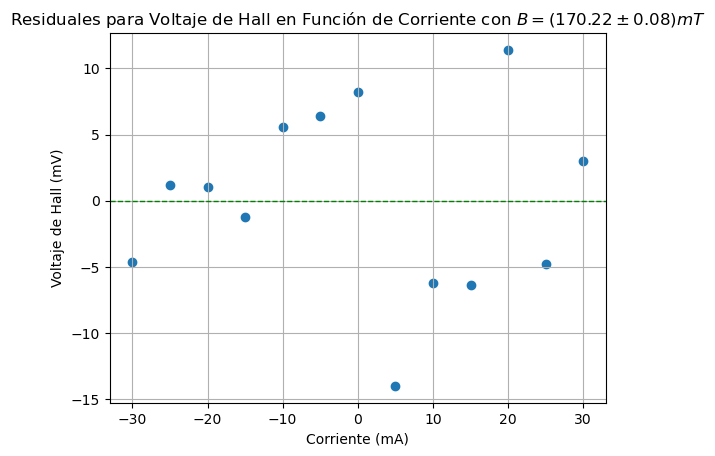

In [8]:
res = (Y - model1)/Yerr

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(X, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_xlabel('Corriente (mA)')
ax2.set_ylabel('Voltaje de Hall (mV)')
ax2.set_title('Residuales para Voltaje de Hall en Función de Corriente con ' + r'$B = (170.22\pm 0.08)mT$')
ax2.grid()

plt.savefig('Bcte_p_0.75A_residual.png', format='png')

In [9]:
Y = data['VH_0.80A (mV)']

w = 1/(Yerr**2)

In [10]:
sum_w = w.sum()
sum_wx = (w*X).sum()
sum_wy = (w*Y).sum()
sum_wxx = (w*X**2).sum()
sum_wxy = (w*X*Y).sum()

In [11]:
m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

In [12]:
print(m)
print(b)

print(m_std_err)
print(b_std_err)

-1.1761538461538463
2.8538461538461544
0.0014824986333222025
0.02773500981126146


In [13]:
model2 = (-1.176)*X + (2.85)

Text(0, 0.5, 'Voltaje de Hall (mV)')

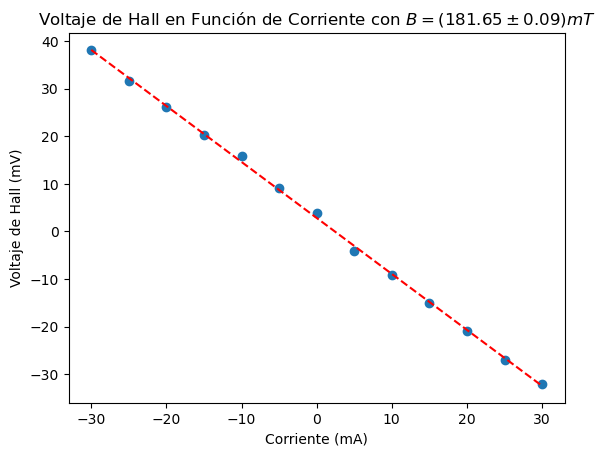

In [14]:
plt.scatter(X, Y)
plt.plot(X, model2, color = 'red', linestyle='--')
plt.title('Voltaje de Hall en Función de Corriente con ' + r'$B = (181.65\pm 0.09)mT$')
plt.xlabel('Corriente (mA)')
plt.ylabel('Voltaje de Hall (mV)')
#plt.savefig('Bcte_p_0.80A.png', format='png')

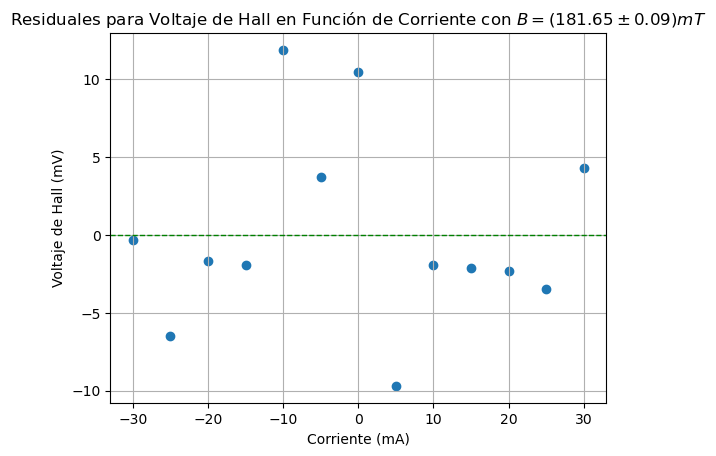

In [15]:
res = (Y - model2)/Yerr

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(X, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_xlabel('Corriente (mA)')
ax2.set_ylabel('Voltaje de Hall (mV)')
ax2.set_title('Residuales para Voltaje de Hall en Función de Corriente con ' + r'$B = (181.65\pm 0.09)mT$')
ax2.grid()

plt.savefig('Bcte_p_0.80A_residual.png', format='png')

In [16]:
Y = data['VH_0.85A (mV)']

w = 1/(Yerr**2)

In [17]:
sum_w = w.sum()
sum_wx = (w*X).sum()
sum_wy = (w*Y).sum()
sum_wxx = (w*X**2).sum()
sum_wxy = (w*X*Y).sum()

In [18]:
m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

In [19]:
print(m)
print(b)

print(m_std_err)
print(b_std_err)

-1.2582417582417584
2.592307692307693
0.0014824986333222025
0.02773500981126146


In [20]:
model3 = (-1.258)*X + (2.59)

Text(0, 0.5, 'Voltaje de Hall (mV)')

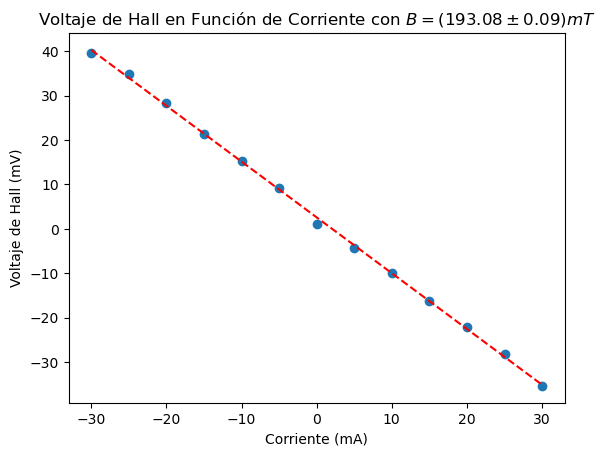

In [21]:
plt.scatter(X, Y)
plt.plot(X, model3, color = 'red', linestyle='--')
plt.title('Voltaje de Hall en Función de Corriente con ' + r'$B = (193.08\pm 0.09)mT$')
plt.xlabel('Corriente (mA)')
plt.ylabel('Voltaje de Hall (mV)')
#plt.savefig('Bcte_p_0.85A.png', format='png')

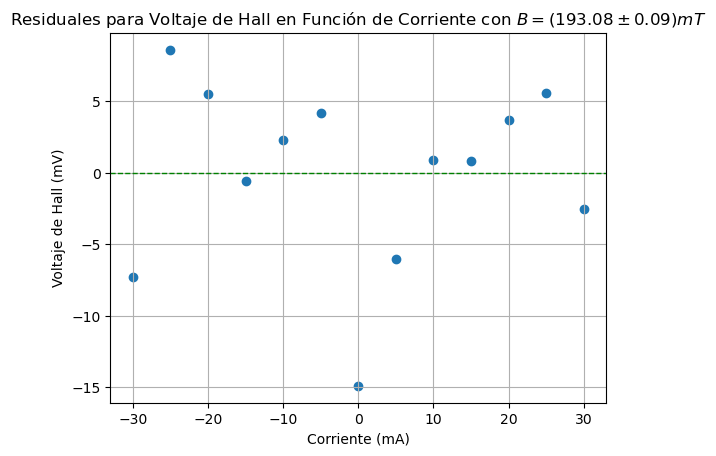

In [22]:
res = (Y - model3)/Yerr

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(X, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_xlabel('Corriente (mA)')
ax2.set_ylabel('Voltaje de Hall (mV)')
ax2.set_title('Residuales para Voltaje de Hall en Función de Corriente con ' + r'$B = (193.08\pm 0.09)mT$')
ax2.grid()

plt.savefig('Bcte_p_0.85A_residual.png', format='png')

In [23]:
Y = data['VH_0.90A (mV)']

w = 1/(Yerr**2)

In [24]:
sum_w = w.sum()
sum_wx = (w*X).sum()
sum_wy = (w*Y).sum()
sum_wxx = (w*X**2).sum()
sum_wxy = (w*X*Y).sum()

In [25]:
m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

In [26]:
print(m)
print(b)

print(m_std_err)
print(b_std_err)

-1.362527472527473
3.246153846153848
0.0014824986333222025
0.02773500981126146


In [27]:
model4 = (-1.363)*X + (3.25)

Text(0, 0.5, 'Voltaje de Hall (mV)')

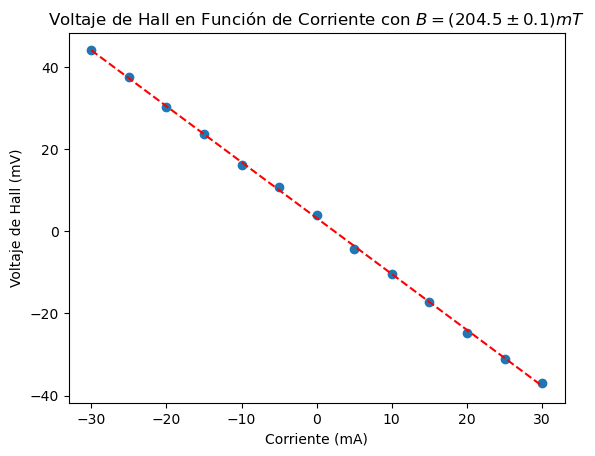

In [28]:
plt.scatter(X, Y)
plt.plot(X, model4, color = 'red', linestyle='--')
plt.title('Voltaje de Hall en Función de Corriente con ' + r'$B = (204.5\pm 0.1)mT$')
plt.xlabel('Corriente (mA)')
plt.ylabel('Voltaje de Hall (mV)')
#plt.savefig('Bcte_p_0.90A.png', format='png')

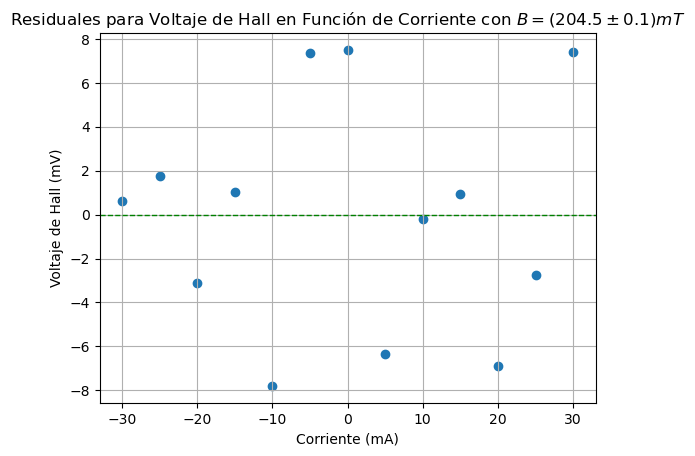

In [29]:
res = (Y - model4)/Yerr

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(X, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_xlabel('Corriente (mA)')
ax2.set_ylabel('Voltaje de Hall (mV)')
ax2.set_title('Residuales para Voltaje de Hall en Función de Corriente con ' + r'$B = (204.5\pm 0.1)mT$')
ax2.grid()

plt.savefig('Bcte_p_0.90A_residual.png', format='png')

In [30]:
Y = data['VH_0.95A (mV)']

w = 1/(Yerr**2)

In [31]:
sum_w = w.sum()
sum_wx = (w*X).sum()
sum_wy = (w*Y).sum()
sum_wxx = (w*X**2).sum()
sum_wxy = (w*X*Y).sum()

In [32]:
m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

In [33]:
print(m)
print(b)

print(m_std_err)
print(b_std_err)

-1.4248351648351647
3.0923076923076915
0.0014824986333222025
0.02773500981126146


In [34]:
model5 = (-1.425)*X + (3.09)

Text(0, 0.5, 'Voltaje de Hall (mV)')

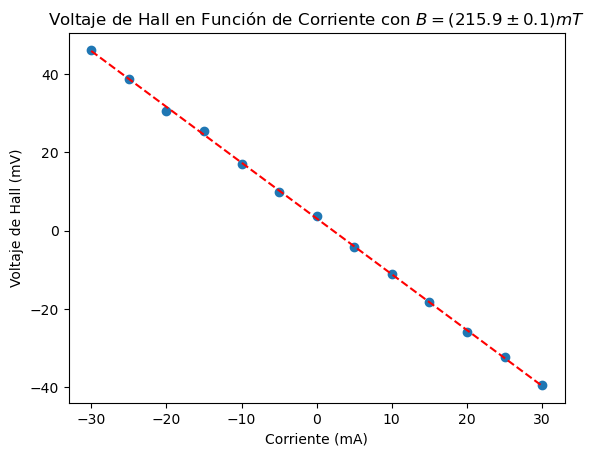

In [35]:
plt.scatter(X, Y)
plt.plot(X, model5, color = 'red', linestyle='--')
plt.title('Voltaje de Hall en Función de Corriente con ' + r'$B = (215.9\pm 0.1)mT$')
plt.xlabel('Corriente (mA)')
plt.ylabel('Voltaje de Hall (mV)')
#plt.savefig('Bcte_p_0.95A.png', format='png')

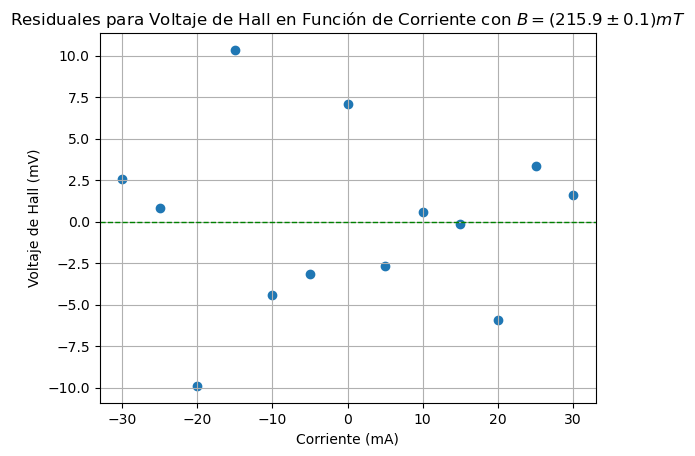

In [36]:
res = (Y - model5)/Yerr

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(X, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_xlabel('Corriente (mA)')
ax2.set_ylabel('Voltaje de Hall (mV)')
ax2.set_title('Residuales para Voltaje de Hall en Función de Corriente con ' + r'$B = (215.9\pm 0.1)mT$')
ax2.grid()

plt.savefig('Bcte_p_0.95A_residual.png', format='png')

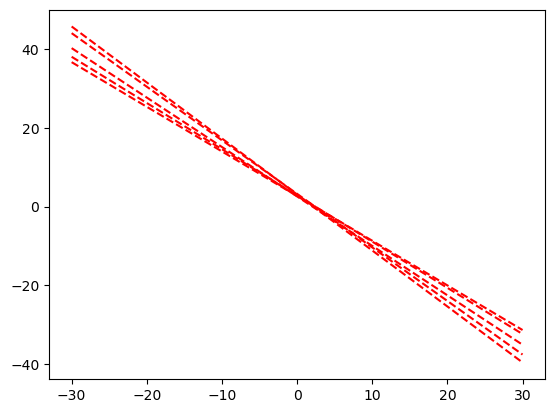

In [37]:
plt.plot(X, model1, color = 'red', linestyle='--')
plt.plot(X, model2, color = 'red', linestyle='--')
plt.plot(X, model3, color = 'red', linestyle='--')
plt.plot(X, model4, color = 'red', linestyle='--')
plt.plot(X, model5, color = 'red', linestyle='--')